In [1]:
# Import the relevant modules:

# Import the modules for vector calculations
import pandas as pd
import polars as pL
import numpy as np
import scipy as sp
import math

# Import the modules for data visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Import the modules for data preprocessing
import h5py

# Import the modules for Deep-Learning
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import torch.utils.data as data_utils
import torch.distributions as distributions
import pytorch_lightning as pl
from pytorch_lightning import Trainer
from pytorch_lightning.loggers import TensorBoardLogger
from pytorch_lightning.callbacks import EarlyStopping, LearningRateMonitor, ModelCheckpoint

In [2]:
with h5py.File('Galaxy10_DECals.h5', 'r') as f:
    Galaxy10 = np.array(f['images'][:])
    labels = np.array(f['ans'][:])
Galaxy10.shape, labels.shape

((17736, 256, 256, 3), (17736,))

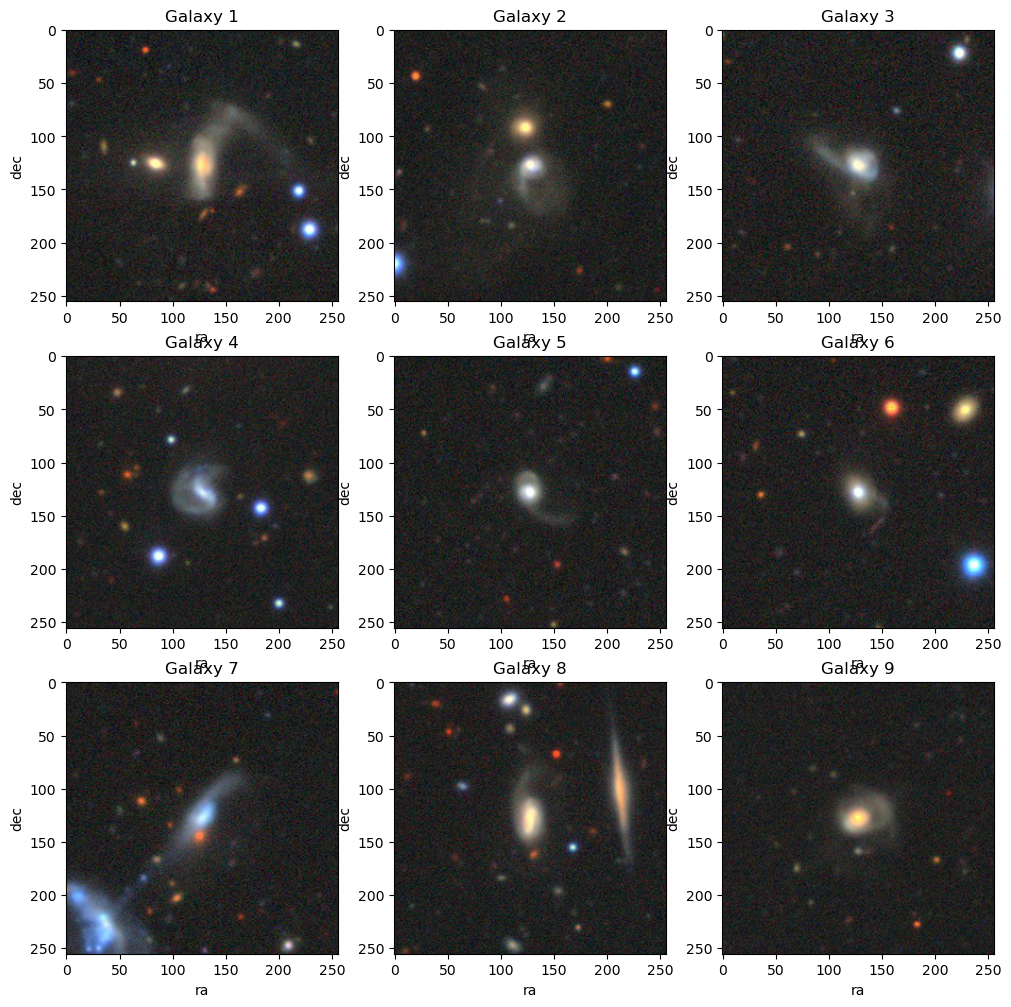

In [3]:
Figure = plt.figure(figsize=(12, 12))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(Galaxy10[i])
    plt.title(f'Galaxy {i + 1}')
    plt.xlabel("ra")
    plt.ylabel("dec")
plt.show()

In [4]:
Train_Validation_Images_Dataset, Test_Images_Dataset = Galaxy10[:int(len(Galaxy10) * 0.8)], Galaxy10[int(len(Galaxy10) * 0.8):]
Train_Validation_Labels_Dataset, Test_Labels_Dataset = labels[:int(len(labels) * 0.8)], labels[int(len(labels) * 0.8):]
Train_Validation_Images_Dataset.shape, Test_Images_Dataset.shape

((14188, 256, 256, 3), (3548, 256, 256, 3))

In [ ]:
from skimage.transform import resize
from tqdm import tqdm # progress which the model
import matplotlib.pyplot as plt
%matplotlib inline
          

ORIG_SHAPE = (256,256)
CROP_SIZE = (128,128)
IMG_SHAPE = (128,128)

def get_image(image, x1,y1, shape, crop_size):
    x = image
    x = x[x1:x1+crop_size[0], y1:y1+crop_size[1]]
    x = resize(x, shape)
    x = x/255.
    return x1
    
def get_all_images(image, shape=IMG_SHAPE, crop_size=CROP_SIZE):
    x1 = (ORIG_SHAPE[0]-CROP_SIZE[0])//2
    y1 = (ORIG_SHAPE[1]-CROP_SIZE[1])//2
   
    sel = image
    ids = sel[:,0].astype(int).astype(str)
    y_batch = sel[:,1:]
    x_batch = []
    for i in tqdm(ids):
        x = get_image(', x1,y1, shape=shape, crop_size=crop_size)
        x_batch.append(x)
    x_batch = np.array(x_batch)
    return x_batch, y_batch
        
X_train, y_train = get_all_images(Train_Validation_Dataset)
X_Valid, y_Valid = get_all_images(Test_Dataset)